In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
df_partidos = pd.read_csv('club_data.csv')
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression

modelor_rl = LinearRegression()
modelor_rl.fit(X_train, y_train)

print('Model trained successfully!')

Model trained successfully!


In [4]:
print('Intercept:', modelor_rl.intercept_)
print('Coefficients:', modelor_rl.coef_)

for idx, col_name in enumerate(X.columns):
    print(f'Coefficient for {col_name}: {modelor_rl.coef_[idx]}')

Intercept: -2.5257192572329767
Coefficients: [ 0.05596278 -0.05125811]
Coefficient for posesion_local (%): 0.055962784392897424
Coefficient for tiros_arco_local: -0.051258111603808595


In [5]:
y_pred = modelor_rl.predict(X_test)

df_results = X_test.copy()
df_results['diferencia_goles_real'] = y_test
df_results['diferencia_goles_pred'] = y_pred.round(2)

df_results.head(10)

,posesion_local (%),tiros_arco_local,diferencia_goles_real,diferencia_goles_pred
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


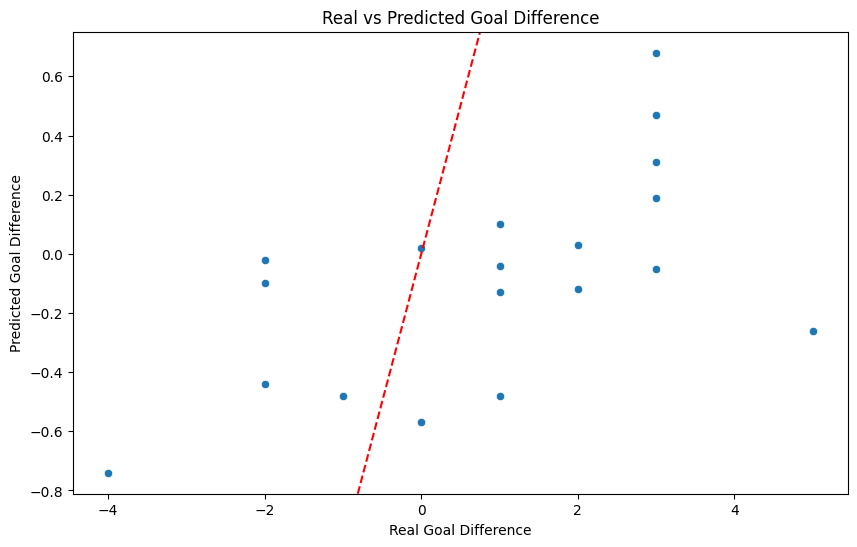

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='diferencia_goles_real', y='diferencia_goles_pred', data=df_results)
plt.title('Real vs Predicted Goal Difference')
plt.xlabel('Real Goal Difference')
plt.ylabel('Predicted Goal Difference')
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.show()

In [10]:
import ipywidgets as widgets

posesion_input = widgets.FloatSlider(min=30, max=70, step=1, description='Posesion (%)')
tiros_input = widgets.FloatSlider(min=1, max=15, step=1, description='Tiros al Arco')

def predict_goal_difference(posesion, tiros):
    input_data = pd.DataFrame([[posesion, tiros]], columns=X.columns)
    prediction = modelor_rl.predict(input_data)[0]
    print(f'Predicted Goal Difference: {prediction:.2f}')

widgets.interact(predict_goal_difference, posesion=posesion_input, tiros=tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posesion (%)', max=70.0, min=30.0, step=1.0), Float…

<function __main__.predict_goal_difference(posesion, tiros)>